# 目次
1. はじめに
2. データ読み込み
3. レベル1 分類モデルを作ろう.
4. レベル2 回帰モデルを作ろう.
5. 総合演習


In [1]:
import warnings
warnings.filterwarnings('ignore')

# PandasとMatplotlibの使い方(復習)
## Pandas (データ読み込み)

In [2]:
import pandas as pd

csv_house = pd.read_csv("../dataset/house_train.csv")#住宅データを読み込む

print(csv_house)#csv_dataすべてを出力
print(csv_house["price"])#価格だけを出力
print(csv_house["price"][0:100])#100行目までの価格を出力
print(csv_house[["price", "sqft_living"]])#価格と家の面積を出力

name_age = csv_house[["price", "sqft_living"]]#価格と家の面積を、name_ageに格納

#name_age.to_csv("price_sqft_living.csv")#ファイルの出力

               id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520   221900.0         3       1.00         1180      5650   
1      6414100192   538000.0         3       2.25         2570      7242   
2      5631500400   180000.0         2       1.00          770     10000   
3      2487200875   604000.0         4       3.00         1960      5000   
4      1954400510   510000.0         3       2.00         1680      8080   
5      7237550310  1230000.0         4       4.50         5420    101930   
6      1321400060   257500.0         3       2.25         1715      6819   
7      2008000270   291850.0         3       1.50         1060      9711   
8      2414600126   229500.0         3       1.00         1780      7470   
9      3793500160   323000.0         3       2.50         1890      6560   
10     1736800520   662500.0         3       2.50         3560      9796   
11     9212900260   468000.0         2       1.00         1160      6000   
12      1141

## Matplotlib (グラフの描画)

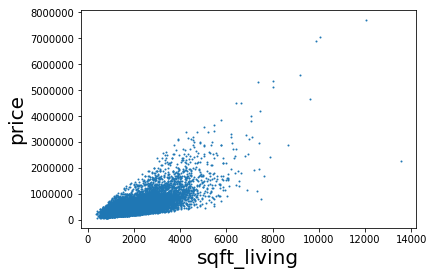

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
csv_data = pd.read_csv("../dataset/house_train.csv")#住宅データを読み込む

#散布図を生成する関数
plt.scatter(csv_data["sqft_living"],csv_data["price"], s=1)
plt.xlabel("sqft_living" ,size = 20)#x軸のタイトル
plt.ylabel("price", size=20)#y軸のタイトル
plt.show()#画面に出力

## 分類モデル
分類問題のよく使われる指標は以下の4つある.
陽性・陰性は予測クラス、疾病あり・疾病なしは正解クラスという例を用いて解説する.
1. Accuracy 陽性・陰性が疾病あり・なしを当てる割合である. 
2. Precision 陽性と判定された人のうち、実際に疾病がある人の割合である.
3. Recall 実際に疾病がある人のうち、陽性と判定される人の割合である.(医療系の解析では, この指標は非常に大切. )
4. F-値  PrecisionとRecall両者のバランスが極端に悪くないものを作りたいときは、この評価指標を使う 

本ワークショップでは主にAccuracyを用いる. 

In [4]:
#y2_predの0を陰性, 1を陽性とし, y2_ansの0を健康な人, 1を疾病者とする.
y2_pred = np.array([1,0,1,0,1,0,0,0,1,1])
y2_ans = np.array([1,0,0,0,1,0,1,1,1,1])

#Accuracy, Precision, Recallを求める. 
accuracy = 0.0
precision_count = 0.0
precision_total = 0
recall_count = 0.0
recall_total  = 0

for i in range(y2_pred.size):
    #Accuracyを求める.
    if y2_ans[i] == y2_pred[i]:
        accuracy = accuracy + (1/y2_pred.size)
    #Precisionを求める.
    if y2_pred[i] ==1:
        precision_total  = precision_total + 1
        if y2_ans[i] == 1:
            precision_count = precision_count + 1
    #Recallを求める.
    if y2_ans[i] == 1:
        recall_total = recall_total + 1
        if y2_pred[i] == 1:
            recall_count = recall_count + 1

precision = precision_count/precision_total
recall = recall_count/recall_total
#f値を求める.
f_value = 2*precision*recall/(precision+recall)

print("accuracyは{:.3f}です.".format(accuracy))  
print("precisionは{:.3f}です.".format(precision))
print("recallは{:.3f}です.".format(recall))
print("F値は{:.3f}です.".format(f_value))

accuracyは0.700です.
precisionは0.800です.
recallは0.667です.
F値は0.727です.


 # 評価指標
 ## 回帰モデル
 
1. 決定係数は1に近いほど精度の高いモデルが生成できているといえる. ただ, 決定係数は線形回帰のみ使用可能である. 
2. RMSE, MAEの値が小さい方が精度の高いモデルが生成できているといえる. ただ, 絶対的な基準があるわけではないので, あくまで複数のモデルを作成し, どのモデルの精度が一番高いのか相対評価を行いたい場面で使用する.
3. RMSEは大きな誤差にペナルティを与えるのに適しており, MAEは平均的な誤差を見たい場合に使用する.

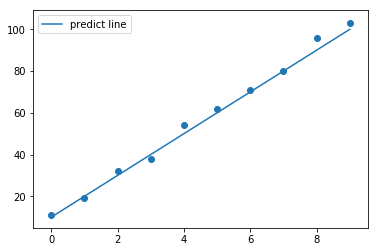

決定係数の値は0.990788です.
RMSEの値は2.757です.
MAEの値は2.200です.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error#2乗誤差
from sklearn.metrics import mean_absolute_error #絶対値誤差
from sklearn.metrics import r2_score#決定係数

#回帰モデルによって予測された値を格納した配列
y_pred = 10 *  np.arange(1,11) #回帰モデルがy = 10xだった場合を例としている.
#訓練データには使っていないテスト用のデータ
y_ans =np.array([11,19,32,38,54,62,71,80,96,103])

r2 = r2_score(y_pred, y_ans)
rmse = np.sqrt(mean_squared_error(y_pred, y_ans))#2乗誤差の和を計算後,　平方根をとる.
mae = mean_absolute_error(y_ans, y_pred)#誤差の絶対値の和をとる.

plt.plot(range(10), y_pred,label = "predict line")
plt.scatter(range(10), y_ans)
plt.legend()
plt.show()

print("決定係数の値は{:3f}です.".format(r2))
print("RMSEの値は{:.3f}です.".format(rmse))
print("MAEの値は{:.3f}です.".format(mae))

# 分類問題 　
## データセット詳細

分類問題で扱うデータセットは以下の情報が格納されている(titanic_train.csv).
1. PassengerId: 乗客のID
2. Survived: 生存(1)、死亡(0)
3. Pclass: 乗客の階級
4. Name: 乗客の名前
5. Sex: 性別
6. Age: 年齢
7. SibSp: タイタニック号に乗っていた兄弟、姉妹、義兄弟、義姉妹、夫、妻の数（自分を除く）
8. Parch: タイタニック号に乗っていた母親、父親、息子、娘の数
9. Ticket: チケットナンバー
10. Fare: 乗船料金
11. Cabin: キャビン番号
12. Embarked: 乗船場

## 1. 欠損値処理
欠損値の処理方法は大きく分けて以下の3つ
1. 欠損値を含む行を削除
2. 欠損値を列の平均値や中央値で補完
3. 似た行や自身の行の他の列の値から推測し、その推定値で補完

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

csv_titanic = pd.read_csv("../dataset/titanic_train.csv")#データを読み込む
csv_titanic.head()#データの中身を確認

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
csv_titanic.isnull().sum()#欠損値数の和を出力.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            153
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          575
Embarked         1
dtype: int64

In [24]:
print("読み込んだデータは行数{:d}, 列数{:d}のデータです"
      .format(csv_titanic.shape[0], csv_titanic.shape[1]))
#"Cabin"という列名を削除
csv_titanic = csv_titanic.iloc[:, csv_titanic.columns != "Cabin"]
#欠損値を含む行を削除
csv_titanic = csv_titanic.dropna()
print("読み込んだデータは行数{:d}, 列数{:d}のデータです"
      .format(csv_titanic.shape[0], csv_titanic.shape[1]))
print(csv_titanic.isnull().sum())#欠損値数の和を出力.

読み込んだデータは行数749, 列数12のデータです
読み込んだデータは行数595, 列数11のデータです
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 2. 文字列を数値に変換

文字列型の値をそのまま分類器に与えることはできない、そこで、文字列型の値を数値に変換する必要がある.　ここで, ダミー変数化を用いる. 

In [25]:
#　男性を0　,　女性を1とした.
csv_titanic = csv_titanic.replace("male",0).replace("female",1)
#乗船場の文字列を数値化した.
Embarked_dummies = pd.get_dummies(csv_titanic["Embarked"])
#Embarkedという列を削除
print("ダミー変数化したときに, Embarkedは{}行{}列のデータになります."
      .format(Embarked_dummies.shape[0], Embarked_dummies.shape[1]))
del(csv_titanic["Embarked"]) 
csv_titanic["S"] = Embarked_dummies["S"]
csv_titanic["Q"] = Embarked_dummies["Q"]
csv_titanic["C"] = Embarked_dummies["C"]
Ticket_dummies = pd.get_dummies(csv_titanic["Ticket"])
print("ダミー変数化したときに, Ticketは{}行{}列のデータになります."
      .format(Ticket_dummies.shape[0], Ticket_dummies.shape[1]))
del(csv_titanic["Ticket"])
#464列にしてまで, ダミー変数化する必要はないと考え, 今回は"Ticket"は不使用. 

ダミー変数化したときに, Embarkedは595行3列のデータになります.
ダミー変数化したときに, Ticketは595行464列のデータになります.


In [21]:
csv_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,S,Q,C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0,0


In [11]:
#目的変数のどの変数が相関しているかを確認.
csv_titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,Q,C
PassengerId,1.000000,0.044839,-0.100336,-0.039988,0.097138,-0.064062,-0.014974,0.083686,-0.004668,-0.045206,0.027375
Survived,0.044839,1.000000,-0.349211,0.530494,-0.084603,-0.023993,0.061558,0.254808,-0.161662,-0.023372,0.184916
Pclass,-0.100336,-0.349211,1.000000,-0.121501,-0.370022,0.078646,0.036289,-0.553855,0.240886,0.124322,-0.319825
Sex,-0.039988,0.530494,-0.121501,1.000000,-0.147536,0.106780,0.244647,0.166654,-0.103371,0.029923,0.096037
Age,0.097138,-0.084603,-0.370022,-0.147536,1.000000,-0.315510,-0.194941,0.075551,-0.041889,-0.026509,0.058036
SibSp,-0.064062,-0.023993,0.078646,0.106780,-0.315510,1.000000,0.378581,0.129222,0.025867,0.042776,-0.048906
Parch,-0.014974,0.061558,0.036289,0.244647,-0.194941,0.378581,1.000000,0.196553,0.042494,-0.050298,-0.020676
Fare,0.083686,0.254808,-0.553855,0.166654,0.075551,0.129222,0.196553,1.000000,-0.280927,-0.063694,0.332759
S,-0.004668,-0.161662,0.240886,-0.103371,-0.041889,0.025867,0.042494,-0.280927,1.000000,-0.371932,-0.888253
Q,-0.045206,-0.023372,0.124322,0.029923,-0.026509,0.042776,-0.050298,-0.063694,-0.371932,1.000000,-0.096030


## アルゴリズムの選定

ランダムフォレストとSVMどちらがよいか..? 
 低次元でデータが少なければSVM、高次元でデータが多ければランダムフォレストを用いるとよいといわれている. ランダムフォレストはハイパーパラメータの調節が比較的楽. SVMは説明変数ごとの単位が違う場合などには正規化が必要であるため、作業量が増える. この例題ではランダムフォレストを使う.

### 交差検証法

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 説明変数と目的変数を用意
X_titanic = csv_titanic[["Age","Pclass","Sex","SibSp","Parch","Fare", "S", "Q", "C"]]
y_titanic = csv_titanic["Survived"]
#実行ごとに結果が変わらないように乱数の種を指定.
clf = RandomForestClassifier(random_state = 0)#分類器の生成
#交差検証法を用いてモデルを評価. 分割数は3
scores = cross_val_score(clf, X_titanic, y_titanic , cv = 3)
print("3回分のacuraccyは{}で, 平均値は{:.3f}です.".format(scores, scores.mean()))

3回分のacuraccyは[0.72864322 0.80808081 0.77777778]で, 平均値は0.772です.


 ### グリッドサーチ

In [35]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators'  : [10, 20, 30],'max_depth': [1,  5, 10],'random_state':[0]}
#n_jobs = -1 にすると, 複数のコアを使って計算してくれる.
cv_titanic = GridSearchCV(clf, params, cv = 3 , n_jobs =-1)
cv_titanic.fit(X_titanic, y_titanic)
print("計算終了")

計算終了


In [14]:
print(cv_titanic.cv_results_) #ハイパーパラメータごとの結果を出力.

{'mean_fit_time': array([0.01843659, 0.03769   , 0.04950738, 0.02214758, 0.03117768,
       0.04705159, 0.018694  , 0.02875129, 0.03575158]), 'std_fit_time': array([0.00281818, 0.00264968, 0.00398866, 0.00362448, 0.00247616,
       0.00250819, 0.00429921, 0.00270181, 0.00290623]), 'mean_score_time': array([0.00261831, 0.00561428, 0.00809916, 0.00251476, 0.00417463,
       0.00563478, 0.00266862, 0.00408673, 0.0035754 ]), 'std_score_time': array([9.66329845e-05, 6.25420999e-04, 3.04759500e-03, 3.65126843e-04,
       6.95065042e-04, 7.82628442e-04, 3.15688587e-04, 4.63209974e-04,
       1.98164361e-04]), 'param_max_depth': masked_array(data=[1, 1, 1, 5, 5, 5, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
             mask=[False, False, False, False, False, False, False, False,
                

In [15]:
cv_titanic.best_params_#評価指標の値が最も大きい時のパラメータを出力.

{'max_depth': 5, 'n_estimators': 10, 'random_state': 0}

### テスト用データを用いて評価

In [41]:
test_titanic =  pd.read_csv("../dataset/titanic_test.csv")
print(test_titanic.isnull().sum())#欠損値数の和を出力.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             24
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          112
Embarked         1
dtype: int64


In [42]:
 #欠損値を平均年齢で補完
test_titanic["Age"] = test_titanic["Age"].replace(pd.np.nan, csv_titanic["Age"].mean())            
#　男性を0　,　女性を1とした.
test_titanic = test_titanic.replace("male",0).replace("female",1)
 #乗船場をダミー変数化した.
test_Embarked_dummies = pd.get_dummies(test_titanic["Embarked"])
del(test_titanic["Embarked"]) 
test_titanic["S"] = test_Embarked_dummies["S"]
test_titanic["Q"] = test_Embarked_dummies["Q"]
test_titanic["C"] = test_Embarked_dummies["C"]
X_test_titanic = test_titanic[["Age","Pclass","Sex","SibSp","Parch","Fare", "S","Q","C"]]
#自動的に一番accuracyの高いハイパーパラメータが採用される.
pred= cv_titanic.predict(X_test_titanic)

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, test_titanic["Survived"])
print("テストデータに対してのaccuracyは{}です.".format(accuracy))

テストデータに対してのaccuracyは0.8591549295774648です.


#### 補足
他の欠損値処理の例として、 名前の敬称ごとの平均年齢を使って, 年齢を補完する等もある. 

# 回帰問題
回帰問題で扱うデータセットは以下の情報が格納されている.

1. id
2. price 価格
3. bedrooms ベットルームの数
4. bathrooms お風呂の数 
5. sqft_living 家の面積 
6. sqft_lot 敷地面積
7. floors 家の中に何フロアあるか
8. waterfront 海岸［湖岸，川岸］の土地か否か
9. view 眺めの良さ.
10. condition どれくらい状態がよいか
11. grade 「King County grading system」に基づいて、住宅部門に与えられた格付け 
12. y_built 建築された年
13. yr_renovated 家が改装された年

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

csv_house = pd.read_csv("../dataset/house_train.csv")#住宅データを読み込む
#最初の5行を表示
print(csv_house.isnull().sum())#欠損値数の和を出力.
csv_house.head()

id              0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0


In [20]:
csv_house.corr()#相関値を調べる.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
id,1.000000,-0.012332,0.000952,0.003562,-0.012617,-0.138381,0.009266,-0.006426,0.017603,-0.019015,0.005838,0.017523,-0.022571
price,-0.012332,1.000000,0.308177,0.521531,0.702182,0.093611,0.280391,0.283310,0.395414,0.044744,0.659890,0.036283,0.138451
bedrooms,0.000952,0.308177,1.000000,0.535959,0.577499,0.035516,0.211342,-0.003320,0.088306,0.027984,0.364837,0.170397,0.022582
bathrooms,0.003562,0.521531,0.535959,1.000000,0.760312,0.098684,0.503834,0.081672,0.203593,-0.095081,0.657630,0.485572,0.068160
sqft_living,-0.012617,0.702182,0.577499,0.760312,1.000000,0.179119,0.398605,0.116773,0.293427,-0.048763,0.766212,0.325131,0.067106
sqft_lot,-0.138381,0.093611,0.035516,0.098684,0.179119,1.000000,0.025973,0.023571,0.073080,-0.019882,0.130294,0.090902,0.006365
floors,0.009266,0.280391,0.211342,0.503834,0.398605,0.025973,1.000000,0.038873,0.058216,-0.220247,0.462967,0.418070,0.036357
waterfront,-0.006426,0.283310,-0.003320,0.081672,0.116773,0.023571,0.038873,1.000000,0.391415,0.018798,0.093658,-0.016387,0.089923
view,0.017603,0.395414,0.088306,0.203593,0.293427,0.073080,0.058216,0.391415,1.000000,0.041577,0.260063,-0.034358,0.101307
condition,-0.019015,0.044744,0.027984,-0.095081,-0.048763,-0.019882,-0.220247,0.018798,0.041577,1.000000,-0.127201,-0.317196,-0.075201


In [21]:
del(csv_house["id"])# 列idの削除

In [22]:
csv_house["yr_renovated"].value_counts()

0       14326
2014       71
2003       30
2005       28
2013       27
2000       23
2007       23
1990       21
2004       19
1983       17
2002       16
1989       16
1991       16
2006       15
2009       15
2010       15
1994       14
1985       14
2001       14
1993       14
1992       13
1984       13
1995       12
2008       12
2015       12
1998       12
1997       12
1999       11
1980       10
1986       10
        ...  
1970        5
1973        4
1969        4
1975        4
1981        4
1963        4
1964        3
1955        3
1953        3
1956        3
1976        2
1967        2
1945        2
1960        2
1957        2
1974        2
1962        2
1958        2
1950        2
1971        2
1972        2
1965        2
1940        2
1951        1
1946        1
1954        1
1959        1
1934        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#### yr_renovatedを以下の条件を満たす値に変更する.
1. 5年以内の場合は10
2. 5*k年以内の場合には10-k
3. リフォームなしの場合には0

In [3]:
max_renovated = np.max(csv_house["yr_renovated"])#最新年数は2014年なので、ここから逆算する

for i in range(1, 11):
    renovated_value = max_renovated - 5*i
    csv_house["yr_renovated"] [csv_house["yr_renovated"] >  renovated_value ]  = 10-i
    print(renovated_value)
csv_house["yr_renovated"] [csv_house["yr_renovated"] >  1900]  = 0

2010
2005
2000
1995
1990
1985
1980
1975
1970
1965


In [24]:
csv_house["yr_renovated"].value_counts()

0    14383
9      128
7      107
8       80
5       69
6       68
4       66
3       55
2       30
1       14
Name: yr_renovated, dtype: int64

## 線形回帰か非線形回帰かを選択
### 線形回帰と非線形回帰

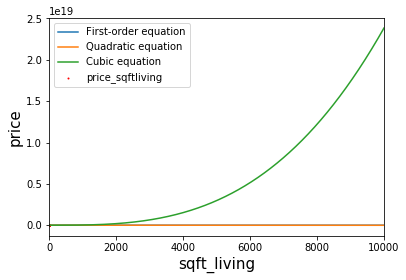

In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

rgs1 = Lasso()
rgs2 = Lasso()
rgs3 = Lasso()
X_test = csv_house.iloc[:,3].values.reshape(-1,1)#説明変数を格納
y_test = csv_house.iloc[:,0]#目的変数を格納
rgs1.fit(X_test, y_test)#家の大きさ, 売却価格の関係を学習.
y = rgs1.predict(np.arange(0,10000).reshape(10000,1))

#2次式の多項式回帰モデルの作成. 
quadratic_test  = PolynomialFeatures(degree = 2)
X_quadratic_test = quadratic_test.fit_transform(X_test)
rgs2.fit(X_quadratic_test, y_test)
a1, a2 = rgs2.coef_[1:]#係数を取得
b = rgs2.intercept_#切片を取得

X = np.arange(10000)
y_quadratic = a1*X + a2*X**2 + b

#3次式の多項式回帰モデルの作成. 
cubic_test  = PolynomialFeatures(degree = 3)
X_cubic_test = cubic_test.fit_transform(X_test)
rgs3.fit(X_cubic_test, y_test)
a1, a2,  a3= rgs3.coef_[1:]#係数を取得
b = rgs3.intercept_#切片を取得

X = np.arange(10000)
y_cubic = a1*X + a2*X**2 + a3*X**3 +  b

plt.plot(y, label = "First-order equation")
plt.plot(y_quadratic, label = "Quadratic equation")
plt.plot(y_cubic, label = "Cubic equation")
plt.scatter(X_test,  y_test,  s=1, c ="r", label = "price_sqftliving")
plt.xlabel("sqft_living" ,size = 15)#x軸のタイトル
plt.ylabel("price", size=15)#y軸のタイトル
plt.xlim(0, 10000)
plt.legend()
plt.show()#画面に出力
plt.clf()

### 線形回帰

In [64]:
from sklearn.linear_model import Lasso#lasso回帰を用いる.
from sklearn.model_selection import GridSearchCV

def normalize(x):
    xmean = x.mean()
    xstd  = np.std(x)
    print("平均値は{}で, 標準偏差は{}です".format(xmean, xstd))
    zscore = (x-xmean)/xstd
    return zscore

rgs = Lasso(normalize=True)#ハイパーパラメータ設定

X_house = csv_house.iloc[:,1:]#説明変数を格納
y_house = normalize(csv_house.iloc[:, 0])#目的変数を格納

params = {"alpha":[0, 0.0001, 0.001, 0.01],"random_state":[0] }
gs_house = GridSearchCV(rgs, params, cv = 20 , n_jobs =-1,scoring= "neg_mean_squared_error")
gs_house.fit(X_house, y_house  )
print("計算完了")

平均値は4554232455.3980665で, 標準偏差は2863788368.837442です
計算完了


In [27]:
gs_house.cv_results_

{'mean_fit_time': array([0.44532537, 0.01532763, 0.01068798, 0.00497619]),
 'std_fit_time': array([0.07775834, 0.00157425, 0.00209497, 0.00237885]),
 'mean_score_time': array([0.00147027, 0.00178761, 0.00141963, 0.00099268]),
 'std_score_time': array([0.00034903, 0.00097703, 0.00027174, 0.00036116]),
 'param_alpha': masked_array(data=[0, 0.0001, 0.001, 0.01],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0, 'random_state': 0},
  {'alpha': 0.0001, 'random_state': 0},
  {'alpha': 0.001, 'random_state': 0},
  {'alpha': 0.01, 'random_state': 0}],
 'split0_test_score': array([-0.3156082 , -0.31196537, -0.36593591, -0.92801374]),
 'split1_test_score': array([-0.50691827, -0.51413918, -0.62991457, -1.39517021]),
 'split2_test_score': array([-0.28130773, -0.2801448

In [28]:
a=gs_house.cv_results_["std_test_score"][gs_house.best_index_]

In [29]:
print("最適なハイパーパラメータは {}です".format(gs_house.best_params_))
print("標準偏差は{:.3f}です.".format(gs_house.cv_results_["std_test_score"][gs_house.best_index_]))
print("回帰係数は{}です.".format(gs_house.best_estimator_.coef_))
print("切片は{}です.".format(gs_house.best_estimator_.intercept_))

最適なハイパーパラメータは {'alpha': 0, 'random_state': 0}です
標準偏差は0.104です.
回帰係数は[-1.10141552e-01  1.12121684e-01  4.96925995e-04 -5.86713805e-07
  3.62378849e-02  1.71673667e+00  1.10454772e-01  5.34310034e-02
  3.27169972e-01 -1.01610548e-02  2.04094483e-02]です.
切片は16.354713509000785です.


In [8]:
from sklearn.preprocessing import PolynomialFeatures
# 2乗したデータまでを格納
quadratic  = PolynomialFeatures(degree = 2)
X_quadratic_house = quadratic.fit_transform(X_house)

In [31]:
testscore_list = gs_house.cv_results_["mean_test_score"]
param_dict = gs_house.cv_results_["params"]

for score, parameter in zip(testscore_list, param_dict):
    print(score, parameter["alpha"])

-0.34755651769630963 0
-0.34937820286331217 0.0001
-0.4190860586566711 0.001
-1.000178458432466 0.01


In [21]:
params4 = {"alpha":[0, 0.00001, 0.0001, 0.001],"random_state":[0] }
gs_house2= GridSearchCV(rgs, params4, cv = 10 , n_jobs =-1,scoring= "neg_mean_squared_error")
gs_house2.fit(X_quadratic_house , y_house )
gs_house2.cv_results_

{'mean_fit_time': array([15.80305841, 12.6019732 ,  3.48611844,  4.37237937]),
 'std_fit_time': array([0.80884995, 1.73706362, 0.85916787, 2.79498446]),
 'mean_score_time': array([0.00835159, 0.00557988, 0.00918159, 0.00429451]),
 'std_score_time': array([0.00589514, 0.00142521, 0.00615831, 0.0014582 ]),
 'param_alpha': masked_array(data=[0, 1e-05, 0.0001, 0.001],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0, 'random_state': 0},
  {'alpha': 1e-05, 'random_state': 0},
  {'alpha': 0.0001, 'random_state': 0},
  {'alpha': 0.001, 'random_state': 0}],
 'split0_test_score': array([-0.98382206, -0.98093238, -0.97626187, -0.99220807]),
 'split1_test_score': array([-1.0205191 , -1.00508103, -0.96323505, -0.97333111]),
 'split2_test_score': array([-0.98235175, -0.9

In [33]:
print("最適なハイパーパラメータは {}です".format(gs_house2.best_params_))
print("標準偏差は{:.3f}です.".format(gs_house2.cv_results_["std_test_score"][gs_house.best_index_]))
print("回帰係数は{}です.".format(gs_house2.best_estimator_.coef_))
print("切片は{}です.".format(gs_house2.best_estimator_.intercept_))

最適なハイパーパラメータは {'alpha': 1e-05, 'random_state': 0}です
標準偏差は0.032です.
回帰係数は[ 0.00000000e+00 -0.00000000e+00 -3.70961378e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -2.73249740e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -4.81009323e-03 -7.01934018e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.48529695e-07
  0.00000000e+00  1.71413945e-01 -3.26146176e-03 -0.00000000e+00
  0.00000000e+00 -1.84435809e-05 -0.00000000e+00  0.00000000e+00
  2.15037200e-05 -1.44328467e-07 -1.52881718e-02 -0.00000000e+00
  0.00000000e+00 -4.28123794e-03  1.67464606e-02 -4.81109634e-08
 -2.64155787e-02  3.16423940e-08 -1.35698402e-09 -1.50882240e-05
  5.56435146e-04 -0.00000000e+00  6.25801705e-05  6.93262612e-05
 -3.09892928e-07  4.20831553e-05  1.70558905e-12  2.95494601e-07
 -0.00000000e+00 -5.32808930e-07 -3.30820313e-07  3.09087898e-07
  8.44545215e-10 -1.42465434e-07  4.46481412e-02 -0.00000000e+00
 -1.81975000e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0

### テストデータに対しての予測

In [61]:
#データごとに平均値, 標準偏差が異なったらまずいので, 定数を与える.
def normalize_test(x):
    xmean = 532513.975
    xstd  = 366713.522
    zscore = (x-xmean)/xstd
    return zscore

csv_house_test = pd.read_csv("../dataset/house_test.csv")

max_renovated = 2014#最新年数は2014年なので、ここから逆算する
#yr_renovatedの前処理. 
for i in range(1, 11):
    renovated_value = max_renovated - 5*i
    csv_house_test["yr_renovated"] [csv_house_test["yr_renovated"] >  renovated_value ]  = 10-i
csv_house_test["yr_renovated"] [csv_house_test["yr_renovated"] >  1900]  = 0

del(csv_house_test["id"])# 列idの削除

# mistake X_house_test = csv_house_test.iloc[:,1:]#テスト用データの説明変数を格納
X_house_test = csv_house_test.iloc[:,1:]
y_house_ans = normalize_test(csv_house_test.iloc[:, 0])#テスト用データの目的変数を格納

In [77]:
#与えられたデータを2乗に拡張する. 
quadratic_test  = PolynomialFeatures(degree = 2)
X_quadratic_house_test = quadratic_test.fit_transform(X_house_test)
#学習済みモデル(線形モデル)を用いて値を予測.

house_pred1= gs_house.predict(X_house_test)
#学習済みモデル(多項式回帰モデル)を用いて値を予測. 
house_pred2 = gs_house2.predict(X_quadratic_house_test)

In [48]:
from sklearn.metrics import mean_squared_error#2乗誤差
MSE_1 = mean_squared_error(house_pred1, y_house_ans )
MSE_2 = mean_squared_error(house_pred2, y_house_ans )
print("線形回帰を用いた時のMSEは{:.3f}で, 多項式回帰(2次式)を用いた時の MSEは{:.3f}です."
      .format(MSE_1, MSE_2))

線形回帰を用いた時のMSEは1.035で, 多項式回帰(2次式)を用いた時の MSEは1.030です.


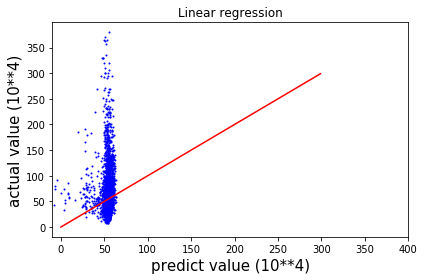

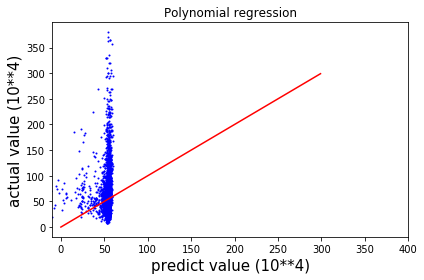

In [78]:
#実際に可視化, Xmeanとxstdを用いて価格に復元する. 
xmean = 532513.975
xstd  = 366713.522
#軸がみにくいので10000で割る.
house_pred1_acutual =   (xstd * house_pred1+ xmean) /10000
house_pred2_acutual =  (xstd * house_pred2+ xmean)/10000
house_ans_acutual=  (xstd * y_house_ans+ xmean)/10000
#線形回帰の予測値と実際の値の比較.
plt.scatter(house_pred1_acutual, house_ans_acutual, c = "b", s = 1)
plt.plot(range(300), range(300), c = "r")
plt.xlabel("predict value (10**4)", size = 15)
plt.ylabel("actual value (10**4)", size = 15)
plt.title("Linear regression")
plt.xlim(-10, 400)
plt.tight_layout()
plt.show()
#多項式回帰(2次式)の予測値と実際の値の比較.
plt.scatter(house_pred2_acutual, house_ans_acutual, c = "b", s = 1)
plt.plot(range(300), range(300), c = "r")
plt.xlabel("predict value (10**4)", size = 15)
plt.ylabel("actual value (10**4)", size = 15)
plt.title("Polynomial regression")
plt.xlim(-10, 400)
plt.tight_layout()
plt.show()

### おまけ
多項式(3次式)で予測してみる.

In [38]:
# 3乗したデータまでを格納
Cubic = PolynomialFeatures(degree = 3)
X_Cubic_house = Cubic.fit_transform(X_house)

params5 = {"alpha":[0, 0.00001, 0.0001, 0.001],"random_state":[0] }
gs_house3= GridSearchCV(rgs, params5, cv = 3 , n_jobs =-1,scoring= "neg_mean_squared_error")
gs_house3.fit(X_Cubic_house , y_house )
gs_house3.cv_results_

{'mean_fit_time': array([12.28114049, 10.06401865,  6.74289409,  2.02775701]),
 'std_fit_time': array([0.06207497, 0.2380845 , 1.76784434, 0.16160447]),
 'mean_score_time': array([0.05061165, 0.07126427, 0.07907399, 0.00507037]),
 'std_score_time': array([0.00869249, 0.0132831 , 0.06836709, 0.00157446]),
 'param_alpha': masked_array(data=[0, 1e-05, 0.0001, 0.001],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0, 'random_state': 0},
  {'alpha': 1e-05, 'random_state': 0},
  {'alpha': 0.0001, 'random_state': 0},
  {'alpha': 0.001, 'random_state': 0}],
 'split0_test_score': array([-7.78222183, -0.9622334 , -0.30698556, -0.38184455]),
 'split1_test_score': array([-0.27844484, -0.28426443, -0.28652198, -0.32870355]),
 'split2_test_score': array([-0.28875268, -0.2

In [39]:
params6 = {"alpha":[0.00006, 0.00008, 0.0001,0.00012, 0.00015, 0.0002],"random_state":[0] }
gs_house3= GridSearchCV(rgs, params6, cv = 3 , n_jobs =-1,scoring= "neg_mean_squared_error")
gs_house3.fit(X_Cubic_house , y_house )
gs_house3.cv_results_

{'mean_fit_time': array([8.6866893 , 7.85402608, 7.66421072, 7.49556311, 6.819496  ,
        4.92945417]),
 'std_fit_time': array([1.24676074, 1.3949072 , 1.52754762, 1.18686986, 0.25613272,
        1.13326439]),
 'mean_score_time': array([0.00898409, 0.00945751, 0.00775727, 0.00752163, 0.00467571,
        0.00263325]),
 'std_score_time': array([0.00136061, 0.00101   , 0.00096763, 0.00147645, 0.00242925,
        0.0006237 ]),
 'param_alpha': masked_array(data=[6e-05, 8e-05, 0.0001, 0.00012, 0.00015, 0.0002],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0, 0, 0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 6e-05, 'random_state': 0},
  {'alpha': 8e-05, 'random_state': 0},
  {'alpha': 0.0001, 'random_state': 0},
  {'alpha': 0.00012, 'random_state': 0},
  {'alpha': 0.00015, 'rand

In [40]:
params6 = {"alpha":[0.00004, 0.00005, 0.00006],"random_state":[0] }
gs_house3= GridSearchCV(rgs, params6, cv = 3 , n_jobs =-1,scoring= "neg_mean_squared_error")
gs_house3.fit(X_Cubic_house , y_house )
gs_house3.cv_results_

{'mean_fit_time': array([9.3801771 , 9.50466736, 6.72716641]),
 'std_fit_time': array([0.30961231, 0.07931202, 3.56909594]),
 'mean_score_time': array([0.00487383, 0.00467396, 0.00451271]),
 'std_score_time': array([0.00208794, 0.00097408, 0.00270608]),
 'param_alpha': masked_array(data=[4e-05, 5e-05, 6e-05],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 4e-05, 'random_state': 0},
  {'alpha': 5e-05, 'random_state': 0},
  {'alpha': 6e-05, 'random_state': 0}],
 'split0_test_score': array([-0.31566275, -0.3127355 , -0.31150662]),
 'split1_test_score': array([-0.28750726, -0.28618942, -0.28583341]),
 'split2_test_score': array([-0.29896422, -0.30292282, -0.30602038]),
 'mean_test_score': array([-0.30071141, -0.30061591, -0.30112014]),
 'std_test_score': array([0.01156064, 0.010

In [41]:
X_Cubic_house_test = Cubic.fit_transform(X_house_test)
house_pred3 = gs_house3.predict(X_Cubic_house_test)#多項式回帰(3次)
MSE_3 = mean_squared_error(house_pred3, y_house_ans )
print("多項式回帰(3次式)を用いた時の MSEは{:.3f}です.".format(MSE_3))
house_pred3_acutual =  (xstd * house_pred3+ xmean)/10000

多項式回帰(3次式)を用いた時の MSEは0.309です.


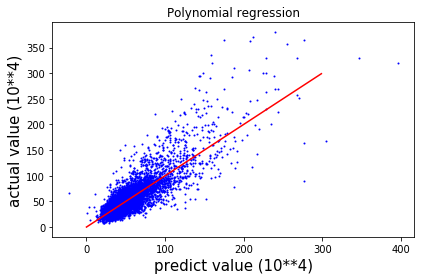

In [42]:
#多項式回帰(3次式)の予測値と実際の値の比較.
plt.scatter(house_pred3_acutual, house_ans_acutual, c = "b", s = 1)
plt.plot(range(300), range(300), c = "r")
plt.xlabel("predict value (10**4)", size = 15)
plt.ylabel("actual value (10**4)", size = 15)
plt.title("Polynomial regression")
plt.tight_layout()
plt.show()